# Question 3 : Education Levels of Business Owners in US

-   What education level do most business owners hold since starting a business can both take time away from academic career as well as be bolstered by higher levels of academia? Can educational priorities vary by state?
-   Owner's highest degree or level of school completed prior to establishing, purchasing, or acquiring the business (EDUC)

---------------------------

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import random
import requests
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = None

pngflag = True

### Extraction:

-   Function that takes in a url for a http get request from our business census api and returns a dataframe

In [42]:
#returns a dataframe after you pass in a string url that's valid hopefully
def getDF(apiurl):
    response = requests.get(apiurl)

    col = response.json()[0] # header row

    test = pd.DataFrame(data = response.json(),columns = col) #makes data frame with the header row as column names
    test.drop(0,axis = 0,inplace=True) #it came with the header row that I dropped
    return test

-   The URLs for acquiring the API calls for education. This utilizes the **'EDUC'** label for **'Characteristics of Business Owners'** in the API call.
-   One of the urls is a request for education data for **all of US** and the other is a request for the education data seperated by **US States**.
-   The URL also contains various variables that are not entirely necessary but were interesting to include if we wanted to look at any other trends.

In [43]:


urlUS= "https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_RACE,OWNER_RACE_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP&for=us:*&NAICS2017=00&QDESC_LABEL="

label = "EDUC"

key ="&key=7325759f1ae7120e7f55c22ccd6fe9de386a7a0c"

urlState= "https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F,OWNPDEMP_S,OWNPDEMP_S_F,OWNPDEMP_PCT_S,OWNPDEMP_PCT_S_F&for=state:*&NAICS2017=00&QDESC_LABEL="

fullurlUS = urlUS + label + key

fullurlState = urlState + label + key

#data frame for US
EDUCdf_US = getDF(fullurlUS)

#data frame for all US States
EDUCdf_States = getDF(fullurlState)


--------------------------------------

### Transform:


1. US and States transformations

These transformations will be simple row and column filtering and some data type changes.
They require no order to be done and they are done for both the US and States dataframes.


-   Filtered out the columns we need to answer education of business owners for both the US dataframe and the States dataframe.
-   In this case: 
    -   We filtered for the column with the education level labels i.e. 'Associate degree', 'Bachelor's degree', etc : OWNCHAR_LABEL.
    -   We filtered for the column number of business owners that fit the surveyed question: 'OWNPDEMP' which will be the number of business owners with x degree/level of education 
    -   We filtered for some other identifiable variables such as 'NAME' which is just 'United States' and 'OWNER_RACE_LABEL' which is 'Asian', 'White', etc.


In [44]:

filter = EDUCdf_US[['NAME','OWNER_RACE_LABEL','OWNCHAR_LABEL','OWNPDEMP']]
display(filter.head(20))

print("\n")

StateFilter = EDUCdf_States[['NAME','OWNER_RACE_LABEL','OWNCHAR_LABEL','OWNPDEMP']]
display(StateFilter.head(20))


,NAME,OWNER_RACE_LABEL,OWNCHAR_LABEL,OWNPDEMP
1,United States,All owners of respondent firms,Less than high school graduate,110743
2,United States,All owners of respondent firms,High school graduate - diploma or GED,791649
3,United States,All owners of respondent firms,"Technical, trade, or vocational school",229223
4,United States,All owners of respondent firms,"Some college, but no degree",583812
5,United States,All owners of respondent firms,Associate degree,229161
6,United States,All owners of respondent firms,Bachelor's degree,1232195
7,United States,All owners of respondent firms,Master's degree,376334
8,United States,All owners of respondent firms,Doctorate degree,77752
9,United States,All owners of respondent firms,Professional degree beyond a bachelor's degree,463423
10,United States,All owners of respondent firms,Total reporting,4094288


,NAME,OWNER_RACE_LABEL,OWNCHAR_LABEL,OWNPDEMP
1,Mississippi,All owners of respondent firms,Less than high school graduate,877
2,Mississippi,All owners of respondent firms,High school graduate - diploma or GED,5443
3,Mississippi,All owners of respondent firms,"Technical, trade, or vocational school",1194
4,Mississippi,All owners of respondent firms,"Some college, but no degree",3749
5,Mississippi,All owners of respondent firms,Associate degree,1725
6,Mississippi,All owners of respondent firms,Bachelor's degree,6399
7,Mississippi,All owners of respondent firms,Master's degree,1695
8,Mississippi,All owners of respondent firms,Doctorate degree,438
9,Mississippi,All owners of respondent firms,Professional degree beyond a bachelor's degree,3513
10,Mississippi,All owners of respondent firms,Total reporting,25030


-   Filtered the OWNER_RACE_LABEL to be only total Respondants by filtering on **'All owners of respondent firms'** in order not to do double counting because of the break out race labels such as 'Asian', 'Native Hawaiian and Other Pacific Islander', 'White', etc. for both the US and States dataframes

In [45]:

#only getting the totals section instead of ethnicity for US DF
totalRespondants = filter['OWNER_RACE_LABEL'] == 'All owners of respondent firms'
newdf = filter[totalRespondants]

display(newdf.head(11))
print("\n")

#only getting the totals section instead of ethnicity for States DF
totalRespondantsStates = StateFilter['OWNER_RACE_LABEL'] == 'All owners of respondent firms'
newdfStates = StateFilter[totalRespondantsStates]

display(newdfStates.head(20))


,NAME,OWNER_RACE_LABEL,OWNCHAR_LABEL,OWNPDEMP
1,United States,All owners of respondent firms,Less than high school graduate,110743
2,United States,All owners of respondent firms,High school graduate - diploma or GED,791649
3,United States,All owners of respondent firms,"Technical, trade, or vocational school",229223
4,United States,All owners of respondent firms,"Some college, but no degree",583812
5,United States,All owners of respondent firms,Associate degree,229161
6,United States,All owners of respondent firms,Bachelor's degree,1232195
7,United States,All owners of respondent firms,Master's degree,376334
8,United States,All owners of respondent firms,Doctorate degree,77752
9,United States,All owners of respondent firms,Professional degree beyond a bachelor's degree,463423
10,United States,All owners of respondent firms,Total reporting,4094288


,NAME,OWNER_RACE_LABEL,OWNCHAR_LABEL,OWNPDEMP
1,Mississippi,All owners of respondent firms,Less than high school graduate,877
2,Mississippi,All owners of respondent firms,High school graduate - diploma or GED,5443
3,Mississippi,All owners of respondent firms,"Technical, trade, or vocational school",1194
4,Mississippi,All owners of respondent firms,"Some college, but no degree",3749
5,Mississippi,All owners of respondent firms,Associate degree,1725
6,Mississippi,All owners of respondent firms,Bachelor's degree,6399
7,Mississippi,All owners of respondent firms,Master's degree,1695
8,Mississippi,All owners of respondent firms,Doctorate degree,438
9,Mississippi,All owners of respondent firms,Professional degree beyond a bachelor's degree,3513
10,Mississippi,All owners of respondent firms,Total reporting,25030


-   Changed 'OWNPDEMP' from Object to **int 64** so that we can plot the numerical values of the number of business owners for both US dataframe and States dataframe


In [46]:

newdf['OWNPDEMP'] = newdf['OWNPDEMP'].astype('int64')
newdf.info()

newdfStates['OWNPDEMP'] = newdfStates['OWNPDEMP'].astype('int64')
newdfStates.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              11 non-null     object
 1   OWNER_RACE_LABEL  11 non-null     object
 2   OWNCHAR_LABEL     11 non-null     object
 3   OWNPDEMP          11 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 440.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 1 to 561
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   NAME              561 non-null    object
 1   OWNER_RACE_LABEL  561 non-null    object
 2   OWNCHAR_LABEL     561 non-null    object
 3   OWNPDEMP          561 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 21.9+ KB


C:\Users\shirl\AppData\Local\Temp\ipykernel_36464\2889756197.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



-   Filter the rows where the Education Level **is not 'Total reporting' or is not 'Item not reported'** because they are not representing an 'Education level' measure for both US dataframe and States dataframe

In [47]:


#removing the weird education reporting such as total and item not reported

newdf = newdf[newdf['OWNCHAR_LABEL'] != 'Total reporting']
newdf = newdf[newdf['OWNCHAR_LABEL'] != 'Item not reported']

display(newdf.head(10))

print("\n")

newdfStates = newdfStates[newdfStates['OWNCHAR_LABEL'] != 'Total reporting']
newdfStates = newdfStates[newdfStates['OWNCHAR_LABEL'] != 'Item not reported']

display(newdfStates.head(20))


,NAME,OWNER_RACE_LABEL,OWNCHAR_LABEL,OWNPDEMP
1,United States,All owners of respondent firms,Less than high school graduate,110743
2,United States,All owners of respondent firms,High school graduate - diploma or GED,791649
3,United States,All owners of respondent firms,"Technical, trade, or vocational school",229223
4,United States,All owners of respondent firms,"Some college, but no degree",583812
5,United States,All owners of respondent firms,Associate degree,229161
6,United States,All owners of respondent firms,Bachelor's degree,1232195
7,United States,All owners of respondent firms,Master's degree,376334
8,United States,All owners of respondent firms,Doctorate degree,77752
9,United States,All owners of respondent firms,Professional degree beyond a bachelor's degree,463423


,NAME,OWNER_RACE_LABEL,OWNCHAR_LABEL,OWNPDEMP
1,Mississippi,All owners of respondent firms,Less than high school graduate,877
2,Mississippi,All owners of respondent firms,High school graduate - diploma or GED,5443
3,Mississippi,All owners of respondent firms,"Technical, trade, or vocational school",1194
4,Mississippi,All owners of respondent firms,"Some college, but no degree",3749
5,Mississippi,All owners of respondent firms,Associate degree,1725
6,Mississippi,All owners of respondent firms,Bachelor's degree,6399
7,Mississippi,All owners of respondent firms,Master's degree,1695
8,Mississippi,All owners of respondent firms,Doctorate degree,438
9,Mississippi,All owners of respondent firms,Professional degree beyond a bachelor's degree,3513
12,Missouri,All owners of respondent firms,Less than high school graduate,2278


### More States Transformations Only

In [48]:

# You can comment this back in if you want to remove a state to have 50 even states rather than 51. I chose District of Columbia because it's just the lowest amount of business owners
# columbiaFilter = newdfStates["NAME"] != 'District of Columbia'
# newdfStates = newdfStates[columbiaFilter]
# Also district of columbia information feels off since there's 0s for certain levels of education.

1. Pivot the states table
-   Pivotted the OWNCHAR_LABEL for each degree/education level to be their own column with the number of business owners (OWNPDEMP) as the columns values with the States as the index/name
-   Need this pivotted table for proportions

In [49]:

newdfStatesPivotted = newdfStates.pivot(index="NAME",columns='OWNCHAR_LABEL',values='OWNPDEMP')
display(newdfStatesPivotted.head())


OWNCHAR_LABEL,Associate degree,Bachelor's degree,Doctorate degree,High school graduate - diploma or GED,Less than high school graduate,Master's degree,Professional degree beyond a bachelor's degree,"Some college, but no degree","Technical, trade, or vocational school"
NAME,,,,,,,,,
Alabama,2078,15228,1341,8836,1403,3258,5959,6197,2399
Alaska,422,2406,220,1744,319,510,1056,2023,561
Arizona,3648,21784,1363,12096,1724,6630,8973,13667,4299
Arkansas,1689,9852,665,8119,870,2288,3769,5343,1700
California,26449,175196,12653,82508,16563,54749,66664,79898,20250


2. Add a new column to the pivotted table that will sum the values of each row
-   Made an EmployeeSum column to sum all the Business Owners for each row so it's the total business owners for each state for this dataframe
-   Need this step for proportions

In [50]:
newdfStatesPivotted.columns
newdfStatesPivotted['BusinessOwnersSum'] = newdfStatesPivotted.sum(axis=1)
display(newdfStatesPivotted.head())


OWNCHAR_LABEL,Associate degree,Bachelor's degree,Doctorate degree,High school graduate - diploma or GED,Less than high school graduate,Master's degree,Professional degree beyond a bachelor's degree,"Some college, but no degree","Technical, trade, or vocational school",BusinessOwnersSum
NAME,,,,,,,,,,
Alabama,2078,15228,1341,8836,1403,3258,5959,6197,2399,46699
Alaska,422,2406,220,1744,319,510,1056,2023,561,9261
Arizona,3648,21784,1363,12096,1724,6630,8973,13667,4299,74184
Arkansas,1689,9852,665,8119,870,2288,3769,5343,1700,34295
California,26449,175196,12653,82508,16563,54749,66664,79898,20250,534930


3. Sort by the BusinessOwnersSum value ascending
-   Choose to sort the values by the business owner sum value ascending so that we can group states by the business owner population for better comparisons on a graph

In [51]:
newdfStatesPivotted.sort_values(by='BusinessOwnersSum',inplace=True)
display(newdfStatesPivotted.head())


OWNCHAR_LABEL,Associate degree,Bachelor's degree,Doctorate degree,High school graduate - diploma or GED,Less than high school graduate,Master's degree,Professional degree beyond a bachelor's degree,"Some college, but no degree","Technical, trade, or vocational school",BusinessOwnersSum
NAME,,,,,,,,,,
District of Columbia,0,2497,125,665,0,1046,1628,418,0,6379
Alaska,422,2406,220,1744,319,510,1056,2023,561,9261
Delaware,596,3241,123,1904,227,1140,1489,1429,589,10738
Vermont,997,3541,193,2622,257,738,918,1065,627,10958
Rhode Island,791,3308,178,2226,279,994,1281,1562,580,11199


### Transformations for States only for Bachelor Degree visuals
4. We are making some transformations to just visualize bachelor degree information

-   For a new dataframe, filter out just the bachelor's degree and the business owners sum columns (this one that we calculated earlier) from the pivotted table we made earlier on the states
-   make a proportions column that has the proportion of bachelor's degree / sum of businessowners with that we calculated earlier

-   For another new dataframe, just filter out on bachelor's degree from the states unpivotted data frame to get all the bachelor degrees for each state


In [52]:
bachelorStatesProp = newdfStatesPivotted[["Bachelor's degree",'BusinessOwnersSum']]

bachelorStatesProp['Proportion'] = bachelorStatesProp['Bachelor\'s degree'] / bachelorStatesProp['BusinessOwnersSum']
display(bachelorStatesProp.head())

print("\n")

bachelorStatesFilter = newdfStates["OWNCHAR_LABEL"] == "Bachelor's degree"
bachelorStates = newdfStates[bachelorStatesFilter]
display(bachelorStates.head())



C:\Users\shirl\AppData\Local\Temp\ipykernel_36464\945848168.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



OWNCHAR_LABEL,Bachelor's degree,BusinessOwnersSum,Proportion
NAME,,,
District of Columbia,2497,6379,0.391441
Alaska,2406,9261,0.259799
Delaware,3241,10738,0.301825
Vermont,3541,10958,0.323143
Rhode Island,3308,11199,0.295384


,NAME,OWNER_RACE_LABEL,OWNCHAR_LABEL,OWNPDEMP
6,Mississippi,All owners of respondent firms,Bachelor's degree,6399
17,Missouri,All owners of respondent firms,Bachelor's degree,24499
28,Montana,All owners of respondent firms,Bachelor's degree,6655
39,Nebraska,All owners of respondent firms,Bachelor's degree,10336
50,Nevada,All owners of respondent firms,Bachelor's degree,8629


### Transoformations on the pivotted states data frame to get slices of 10 states each
4. We are making some transformations to help visualize the states to not look so cluttered (has nothing to do with bechelor degree visualizations)
-   1. Filters and slices the state names by 10s and stores a list of list of states so that we can graph 10 states at a time later for good visualbility 
-   2. Using the list of list of states, we are going to slice our unpivotted states data frame by filtering out only the states names in each list so that we get ~ 5 data frames that have information on 10 states each. 
-   3. Append each new dataframe slice to a list to access them all to graph each one individually later.


In [53]:
listOfStatesToFilter = [] #list of list of state names
begin = 0 # beginning slicer
count = 10 #ending slicer
print(f"Number of States: {len(newdfStatesPivotted)}")

#loop 
while count < len(newdfStatesPivotted):
    #slice the pivotted sorted data frame to get 10 states
    tempstates = newdfStatesPivotted[begin:count]
    #change the begin and ending slicers by 10 to get the next 10 states
    begin = begin + 10 
    count += 10
    #append a list of state names which we get from the index
    listOfStatesToFilter.append([x for x in tempstates.index])
    
    #if there are any remaining states at the end that isn't going to give an even slice of 10
    if count >= len(newdfStatesPivotted):
        tempstates = newdfStatesPivotted[begin:]
        listOfStatesToFilter.append([x for x in tempstates.index])
        
        

print(listOfStatesToFilter[0])



Number of States: 51
['District of Columbia', 'Alaska', 'Delaware', 'Vermont', 'Rhode Island', 'Wyoming', 'Hawaii', 'North Dakota', 'South Dakota', 'West Virginia']


In [54]:

listofSliceOfDFs = []
for i in range(len(listOfStatesToFilter)):
    sliceOfnewdfStatesFilter = newdfStates["NAME"].isin(listOfStatesToFilter[i])
    sliceOfnewdfStates = newdfStates[sliceOfnewdfStatesFilter]
    listofSliceOfDFs.append(sliceOfnewdfStates)
    




-----------------------------------------------------------------------------------------------------------------------------------------------

### Load: STATES VISUALIZATIONS : ALL DEGREES
-   Uses a bar chart with plotly that plots each data frame of 10 states as a stacked bar chart stacking the number of business owners with each education levels on top for each state
-   If a data frame only has information on 1 state, it will plot it has a bar chart as bars representing each degree/education level
-   Optional: Add a color dictionary for the education level to display the categories in the bar charts as your specific colors.

90


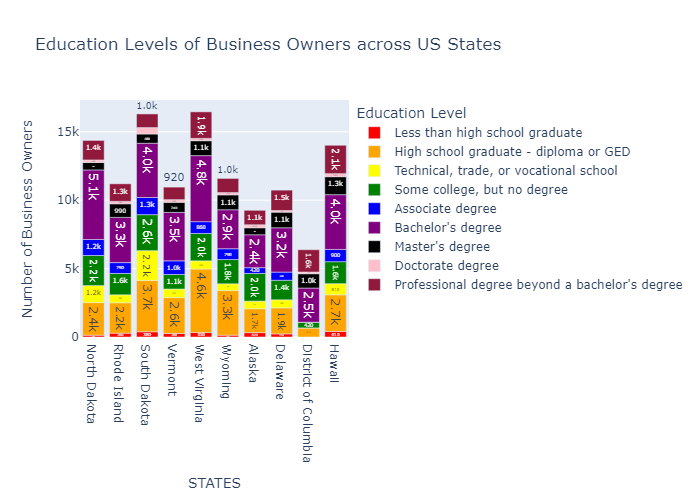

90


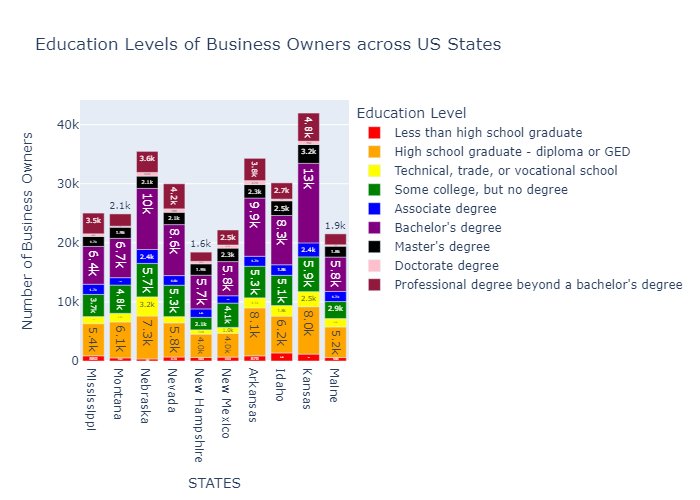

90


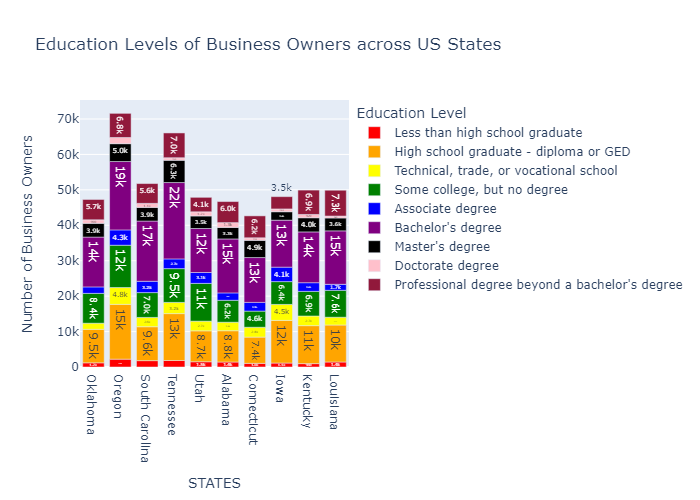

90


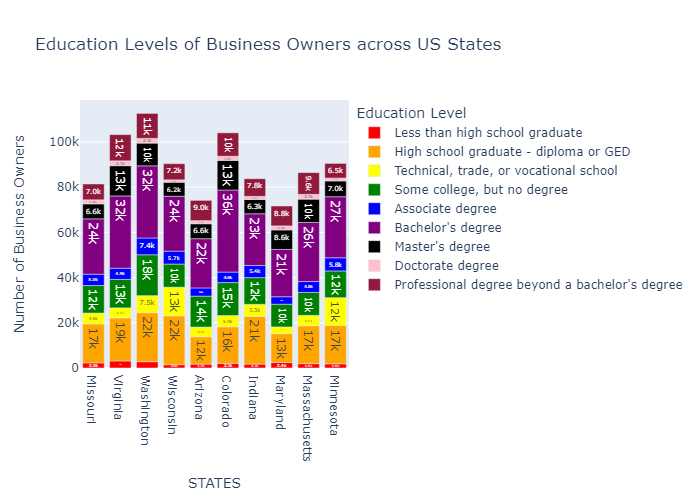

90


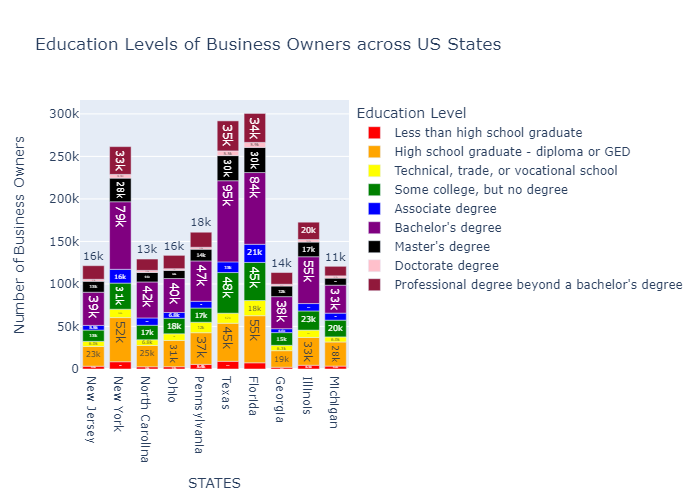

9


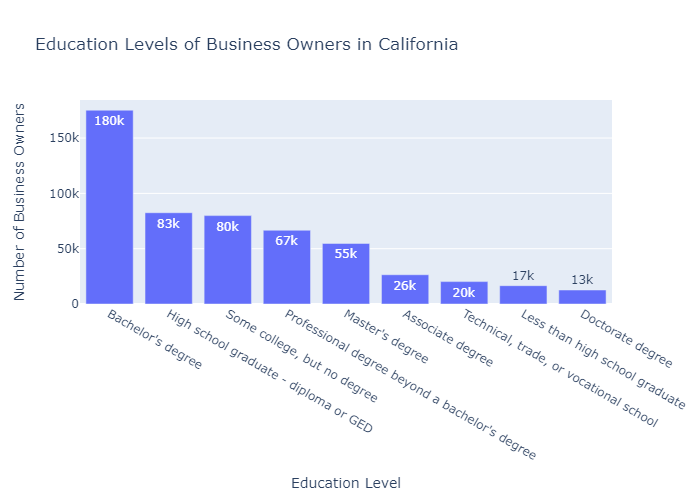

In [55]:
colormap={"Less than high school graduate":"red",
"High school graduate - diploma or GED":"orange",
"Technical, trade, or vocational school":"yellow",
"Some college, but no degree":"green",
"Associate degree":"blue",
"Bachelor's degree":"purple",
"Master's degree":"black",
"Doctorate degree":"pink",
"Professional degree beyond a bachelor's degree":"#91193b"}

for df in listofSliceOfDFs:
    print(len(df))
    if len(df) == 9:
        name = df.NAME.values
        name = name[0]
      
        fig = px.bar(df.sort_values(by='OWNPDEMP',ascending=False),x='OWNCHAR_LABEL',y='OWNPDEMP',text_auto = '.2s',title=f"Education Levels of Business Owners in {name}",
             labels ={"OWNCHAR_LABEL":"Education Level",
                    "OWNPDEMP":"Number of Business Owners"},
             color_discrete_map=colormap)
    else:  
        fig = px.bar(df, x="NAME", y="OWNPDEMP", color="OWNCHAR_LABEL", text_auto='.2s',title="Education Levels of Business Owners across US States",
                    labels ={"NAME":"STATES",
                            "OWNPDEMP":"Number of Business Owners",
                            "OWNCHAR_LABEL":"Education Level"},
                    color_discrete_map=colormap)
    if pngflag:
        fig.show("png")
    else:
        fig.show()




-   Plotting a stacked bar chart that includes all states but this is just the same information as the above bar charts just visually less appealing.

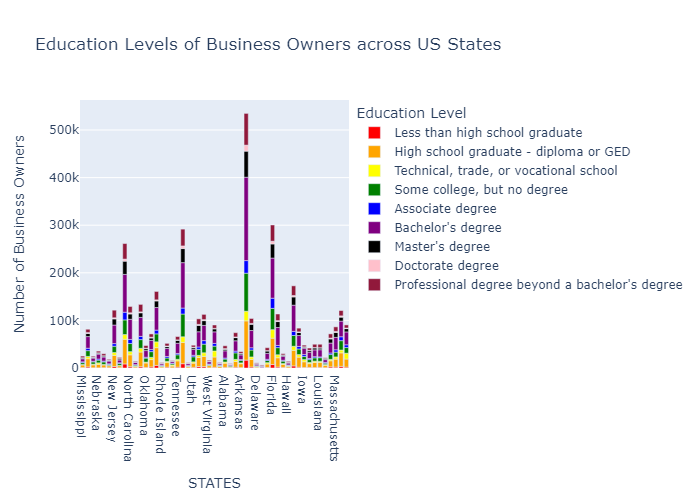

In [56]:

newdfStates
fig = px.bar(newdfStates, x="NAME", y="OWNPDEMP", color="OWNCHAR_LABEL", title="Education Levels of Business Owners across US States",
               labels ={"NAME":"STATES",
                    "OWNPDEMP":"Number of Business Owners",
                    "OWNCHAR_LABEL":"Education Level"},
               color_discrete_map=colormap)
if pngflag:
     fig.show("png")
else:
     fig.show()
# fig = px.bar(newdfStates.sort_values(by='OWNPDEMP',ascending=False), x="NAME", y="OWNPDEMP", color="OWNCHAR_LABEL", title="Education Levels of Business Owners across US States",
#                labels ={"NAME":"STATES",
#                     "OWNPDEMP":"Number of Business Owners",
#                     "OWNCHAR_LABEL":"Education Level"})
# fig.show()




------------------------------------------

### LOAD: STATE VISUALIZATIONS : BACHELOR DEGREE ONLY

-   Bachelor degree of all states by proprotion relative to all other degrees
-   Optionally can sort the values on proportion or not.

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, District of Columbia to South Dakota
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bachelor's degree  51 non-null     int64  
 1   BusinessOwnersSum  51 non-null     int64  
 2   Proportion         51 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.6+ KB


C:\Users\shirl\AppData\Local\Temp\ipykernel_36464\4098774651.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



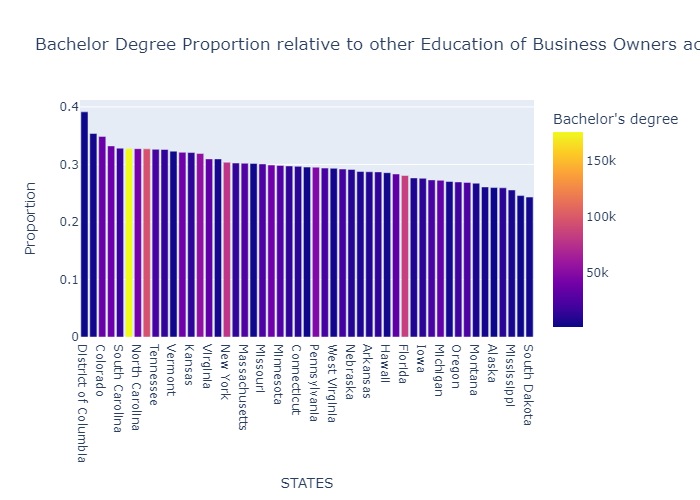

In [57]:
# bachelorStatesProp = newdfStatesPivotted[["Bachelor's degree",'BusinessOwnersSum']]

# bachelorStatesProp['Proportion'] = bachelorStatesProp['Bachelor\'s degree'] / bachelorStatesProp['BusinessOwnersSum']
# display(bachelorStatesProp.head())
bachelorStatesProp.sort_values(by='Proportion',ascending=False,inplace=True)
bachelorStatesProp.info()

fig = px.bar(bachelorStatesProp, x=bachelorStatesProp.index, y="Proportion", color="Bachelor's degree", title="Bachelor Degree Proportion relative to other Education of Business Owners across US States",
               labels ={"NAME":"STATES",
                    })

if pngflag:
     fig.show("png")
else:
     fig.show()






-   Since Bachelor Degree seemed to be most prominant education level among business owners, we plotted number of business owners with bachelor degrees across all states
-   Optionally can sort the values on Business Owner Number or not.

C:\Users\shirl\AppData\Local\Temp\ipykernel_36464\1761595876.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



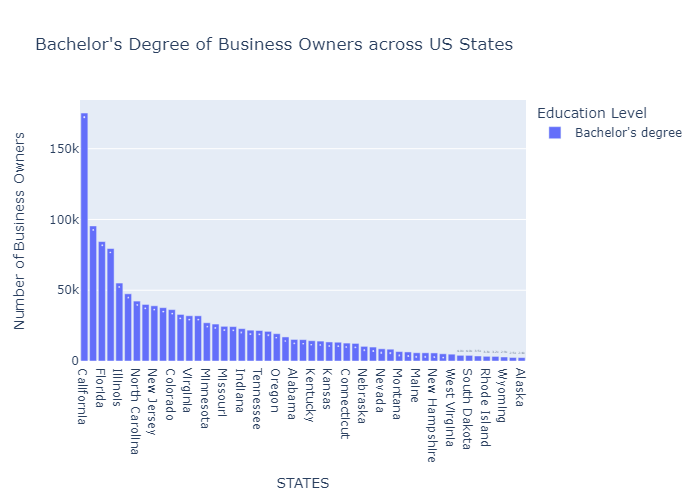

In [58]:
# bachelorStatesFilter = newdfStates["OWNCHAR_LABEL"] == "Bachelor's degree"
# bachelorStates = newdfStates[bachelorStatesFilter]
bachelorStates

bachelorStates.sort_values(by='OWNPDEMP',ascending=False,inplace=True)

#plot the total as bar
fig = px.bar(bachelorStates, x="NAME", y="OWNPDEMP",text_auto = '.2s', color="OWNCHAR_LABEL", title="Bachelor's Degree of Business Owners across US States",
               labels ={"NAME":"STATES",
                    "OWNPDEMP":"Number of Business Owners",
                    "OWNCHAR_LABEL":"Education Level"})


#fig.write_image(r"../images/education_bar_chart.png",format='png',engine='kaleido')
if pngflag:
     fig.show("png")
else:
     fig.show()


---------------------------------------

### Load: US VISUALIZATIONS: ALL DEGREES
-   Loading the filtered out US dataframe into plotly graphics using bar chart and tree map to show the number of business owners that hold what degree/education level in the US
-   Optionally can sort the values on Business Owner Number or not.

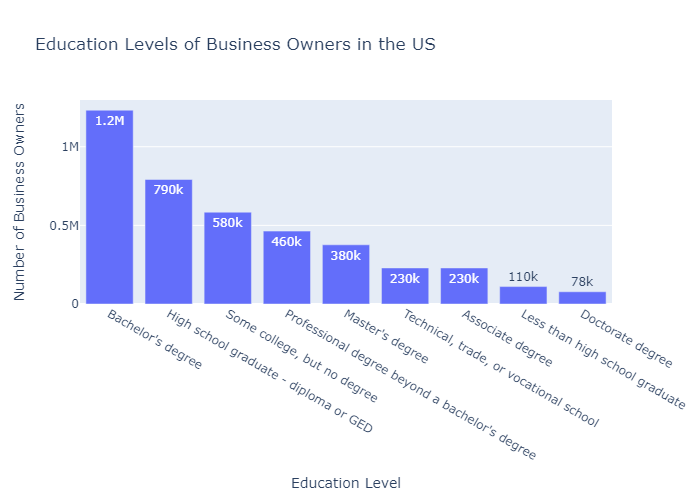

In [59]:
#plot the total as bar
newdf.sort_values(by='OWNPDEMP',ascending=False,inplace=True)
fig = px.bar(newdf,x='OWNCHAR_LABEL',y='OWNPDEMP',text_auto = '.2s',title="Education Levels of Business Owners in the US",
             labels ={"OWNCHAR_LABEL":"Education Level",
                    "OWNPDEMP":"Number of Business Owners"})

#fig.write_image(r"../images/education_bar_chart.png",format='png',engine='kaleido')
if pngflag:
       fig.show("png")
else:
       fig.show()



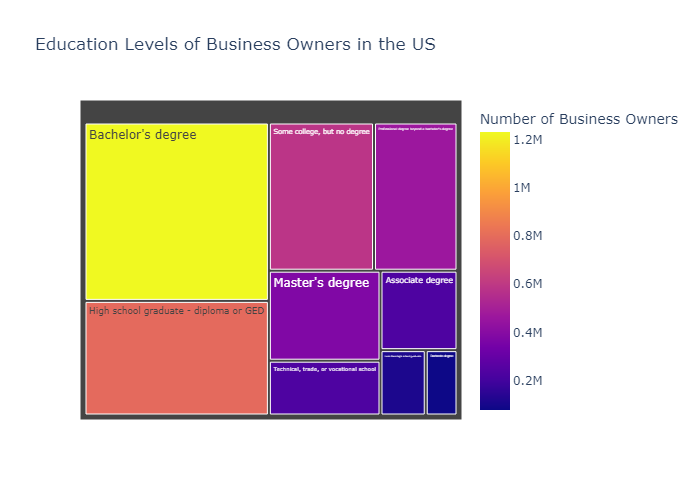

In [60]:

#same thing but as treemap
fig = px.treemap(newdf, path=['OWNCHAR_LABEL'], values='OWNPDEMP',
                title="Education Levels of Business Owners in the US",
                color='OWNPDEMP',names='OWNPDEMP',labels = { "OWNPDEMP":"Number of Business Owners"})
#fig.write_image(r"../images/education_treemap.png",format='png',engine='kaleido')
if pngflag:
    fig.show("png")
else:
    fig.show()
